<a href="https://colab.research.google.com/github/ZeynepRuveyda/OpenCV_Course_Documentation/blob/main/Image_enhancement_and_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)">The RGB color space</font>
The RGB color space is an additive color space in which Red, Green and Blue light rays are added in various proportions to produce different colors. It is the most commonly used color space in image processing.

![Illustration of RGB as an additive color space](https://www.dropbox.com/s/8yntkhndjhe5si2/RGBcolorspace.png?dl=1)

As we have seen earlier, in OpenCV, the image is loaded into BGR format by default. It is the same as RGB, but stored in reverse order. 

For images with 8-bit per channel, the intensity values for a given channel can range from 0 to 255. Brighter pixels signify higher intensity values in a particular channel and vice-versa. The three channels (R, G, B) of our example image are shown below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/My Drive/OpenCV_Documentation/week4/data4/'

In [ ]:
# Import module
import cv2
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [ ]:
#read the image in BGR format
bgr = cv2.imread(DATA_PATH+"images/capsicum.jpg")

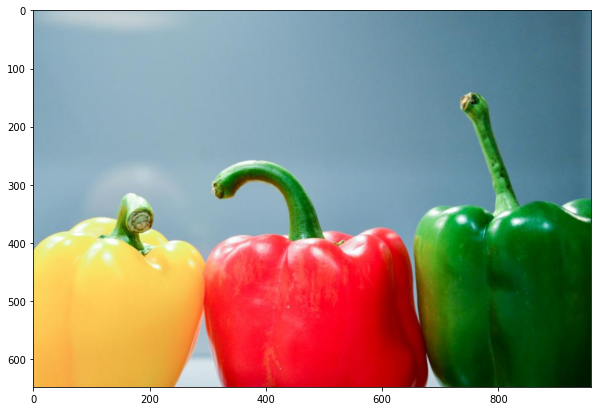

In [ ]:
plt.imshow(bgr[:,:,::-1])

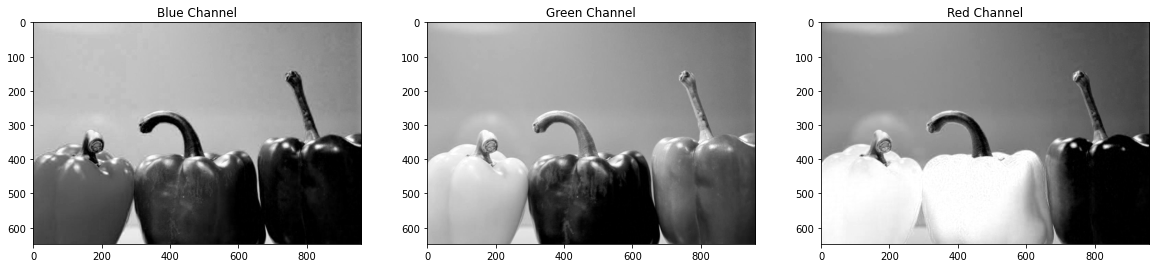

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(bgr[:,:,0],cmap='gray')
plt.title("Blue Channel");
plt.subplot(132)
plt.imshow(bgr[:,:,1],cmap='gray')
plt.title("Green Channel");
plt.subplot(133)
plt.imshow(bgr[:,:,2],cmap='gray')
plt.title("Red Channel");

In the above figure, it can be seen that the red color (middle pepper) displays high intensity ( bright color) only in the R channel whereas the yellow color (left pepper) has high intensity values in both R and G channels which can be attributed to the additive property of the color space (yellow is a mixture of red and green).

In the RGB color space, all three channels contain information about the color as well as brightness. It is better for some applications if we can separate the color component, also known as ***Chrominance*** , from the lightness or brightness component also known as ***Luminance***. This separation is present in the other color spaces we will talk about next.

# <font style="color:rgb(50,120,229)">The HSV color space</font>

This is one of the most popular color spaces used in image processing after the RGB color space. Its three components are :

- **Hue** - indicates the color / tint of the pixel

- **Saturation** - indicates the purity (or richness) of the color

- **Value** - indicates the amount of brightness of the pixel

The HSV color space converts the RGB color space from cartesian coordinates (x, y, z) to cylindrical coordinates (ρ, φ, z). It is **more intuitive than the RGB color space** because it separates the color and brightness into different axes. This makes it easier for us to describe any color directly.

Let us first see how to convert an image from BGR to HSV format and display the different channels to get some more insights about them. We will use OpenCV’s [**`cvtColor`**](https://docs.opencv.org/4.1.0/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function for conversion.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.cvtColor(	src, code[, dst[, dstCn]]	)
```

**Parameters**

- **`src`** - input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
- **`dst`** - output image of the same size and depth as src.
- **`code`** - color space conversion code (see ColorConversionCodes).
- **`dstCn`** - number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code.


In [ ]:
#read the image in BGR format
bgr = cv2.imread(DATA_PATH+"images/capsicum.jpg")

In [ ]:
# convert from bgr to HSV format
hsvImage = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

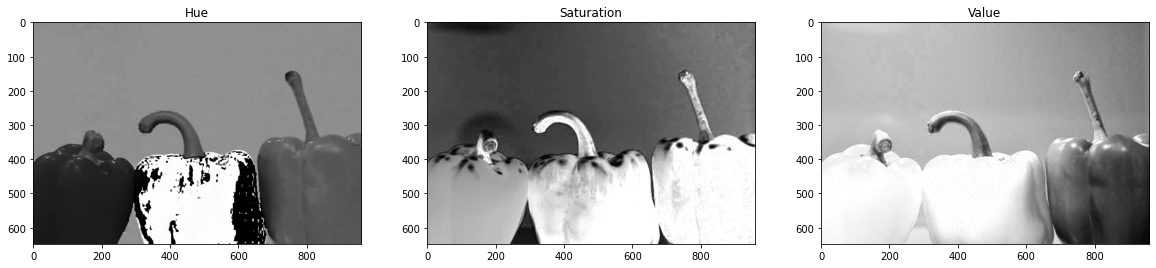

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(hsvImage[:,:,0],cmap='gray')
plt.title("Hue");
plt.subplot(132)
plt.imshow(hsvImage[:,:,1],cmap='gray')
plt.title("Saturation");
plt.subplot(133)
plt.imshow(hsvImage[:,:,2],cmap='gray')
plt.title("Value");

#### <font style="color:rgb(8,133,37)">Hue </font>
The Hue channel refers to the color and its values, ranging from 0 to 180 in OpenCV. Since the HSV color space is represented in a **cylindrical coordinate system**, the values for Hue wrap around 180. For example, the Hue for red color is near 180. So, some tints of red can wrap around 180 and have values around 0. This is evident from the middle (red) pepper in the figure above, which shows both very high (180) and low (0) Hue values for the red pepper.

#### <font style="color:rgb(8,133,37)">Saturation </font>
Saturation refers to how pure the color is. Pure red has high saturation. **Different shades of a color correspond to different saturation levels**. Saturation of 0 corresponds to white color which indicates that the color shade is at the lowest or the color is simply absent. 

So, in the figure above, we can see that the green and red peppers are highly saturated, i.e. these colors are in their purest form. On the other hand, the yellow pepper has relatively lower saturation. With the Hue and Saturation channels known, we have a better idea about the color and tints or shades of color in our image.

#### <font style="color:rgb(8,133,37)">Value </font>
**Value refers to lightness or brightness**. It indicates how dark or bright the color is. It also signifies the amount of light that might have fallen on the object. It is pretty clear from the original image and the Value channel that the red and yellow peppers are much brighter as compared to the green pepper.

We will see two simple applications using the HSV color space in the next section.

### <font style="color:rgb(8,133,37)">Value Test</font>

The first experiment is to create an HSV image where H, S, and V components are all 0 in the begining. We will then keep the H and S components constant at 0, and vary the V (value) component. We then convert the image to RGB color space to see what effect changing the value has to the perception of color. 

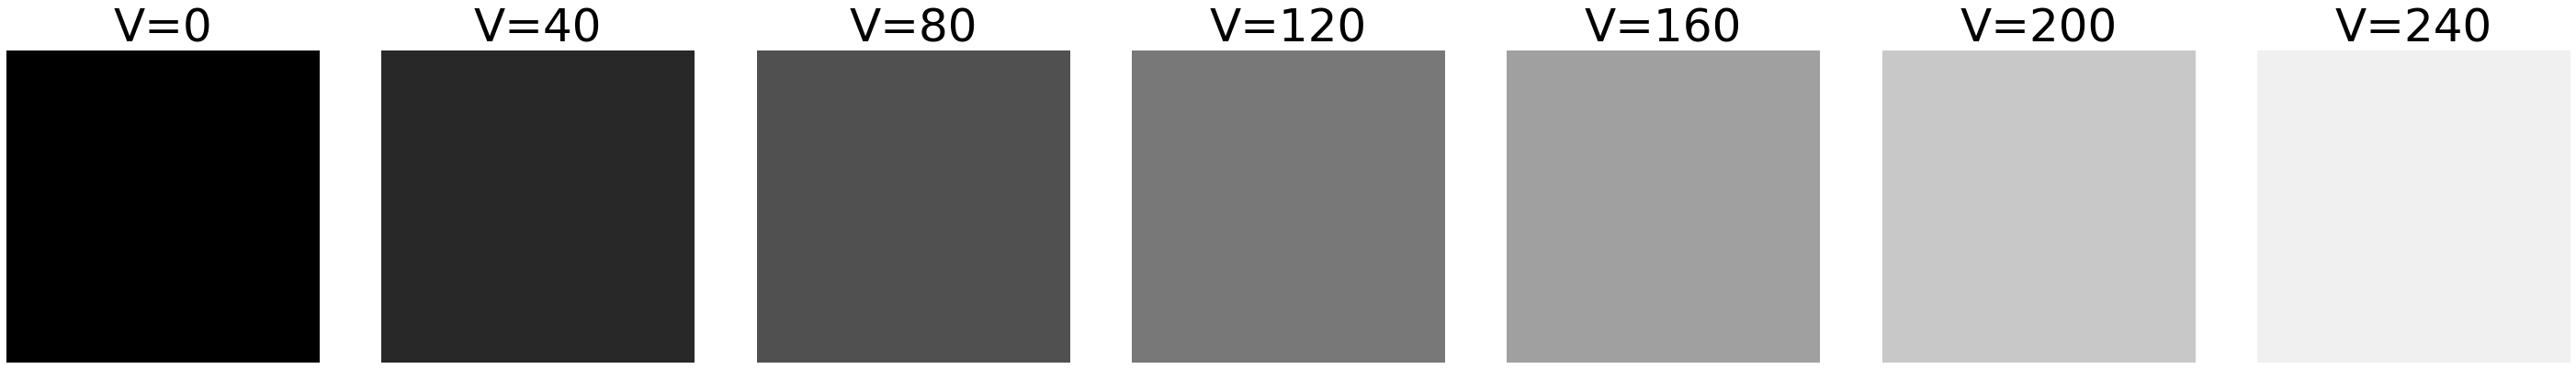

In [ ]:
# Value test. 
plt.figure(figsize=(50,50))

for i in range(0,7):
    # Create 50x50 HSV image with all zeros
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)
    
    # Set Hue = 0, Saturation = 0, Value = i x 40
    v = i * 40
    imhsv[:,:,:] = (0, 0, v)
    
    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('V='+ str(v), fontdict={'fontsize': 50, 'fontweight': 'medium'})

As you can see, **value controls the brightness of the image**. When the value is 0, the image is black and when it is close to 255, the image is white. 

### <font style="color:rgb(8,133,37)">Saturation Test</font>

In this test, we will set H to 0, V to 128 and vary the saturation from 0 to 240. 


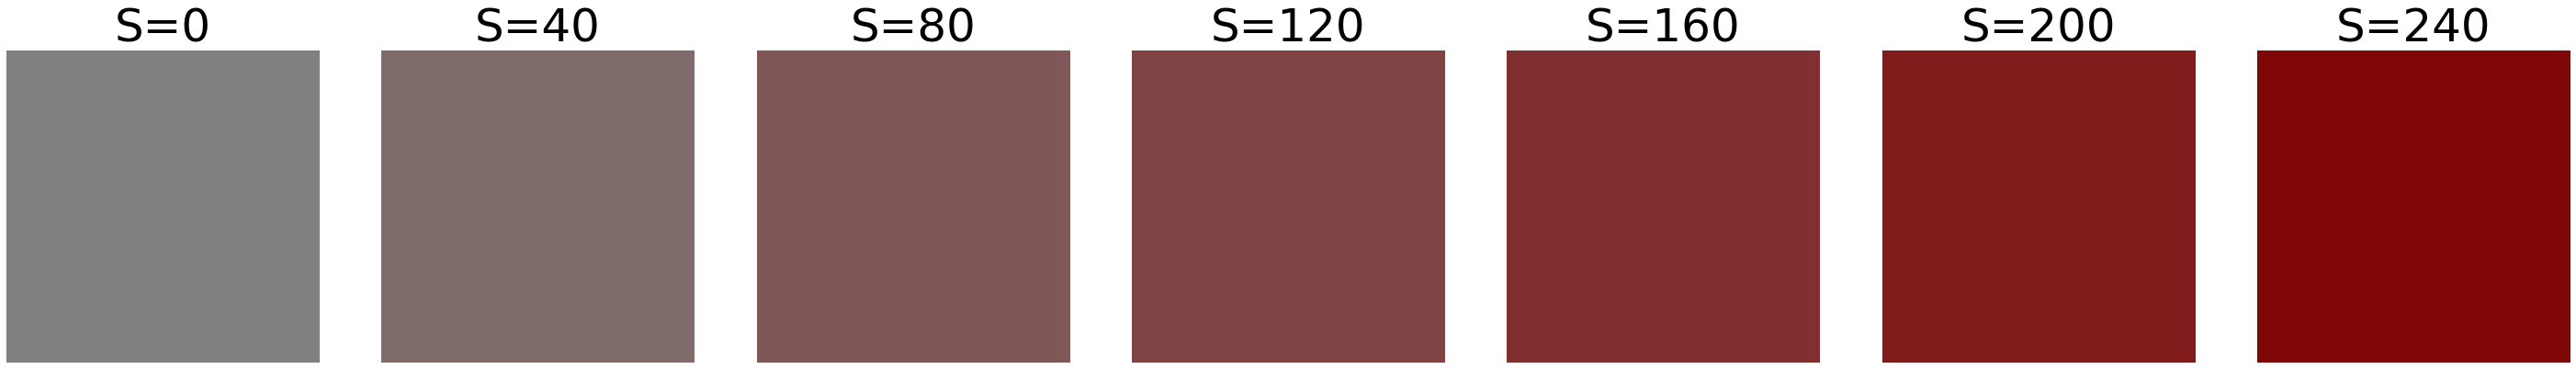

In [ ]:
# Saturation test. 
# Set brightness to 128, hue to 0, and change saturation

plt.figure(figsize=(50,50))
for i in range(0,7):
    # Create 50x50 HSV image with all zeros
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)
    
    # Set Hue = 0, Saturation = i * 40, Value = 128
    s = i * 40
    imhsv[:,:,:] = (0, s, 128)

    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)
    
    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('S='+ str(s), fontdict={'fontsize': 50, 'fontweight': 'medium'})

**Conclusion** : Saturation controls how rich a color is. **If the color is faded, it is less saturated. When it is intense and deep, it is more saturated. When the saturation is 0, we lose all color information and the image looks grayscale.**

### <font style="color:rgb(8,133,37)">Hue Test</font>

In this test, we will set S and V to 128, and vary the Hue from 0 to 180. 


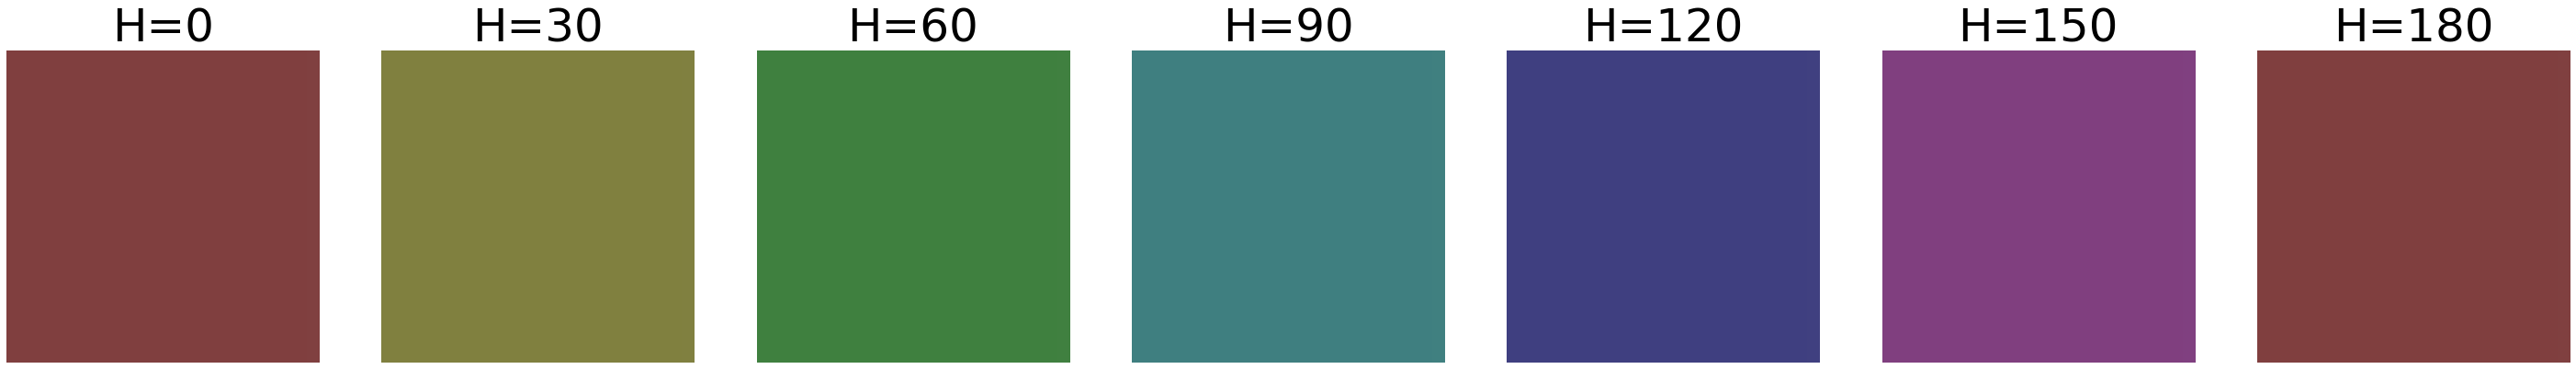

In [ ]:
# Hue Test

plt.figure(figsize=(50,50))

for i in range(0,7):
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)

    # Set Hue = i x 30, Saturation = 128, and Value = 128.
    h = i * 30
    imhsv[:,:,:] = ( h, 128, 128)
    
    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)
    
    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('H='+ str(h), fontdict={'fontsize': 50, 'fontweight': 'medium'})

**Conclusion** : Hue controls the perception of color. It is represented as an angle where a hue of 0 is red, green is 120 degrees ( 60 in OpenCV ), and blue is at 240 degrees( 120 in OpenCV ). In OpenCV, Hue is goes from 0 to 180 intensities values where one grayscale intensity change represents 2 degrees. 

Because hue is angle, you get red color for both H = 0 and H = 360 ( or 180 in OpenCV's representation )

# <font style = "color:rgb(50,120,229)">The YCrCb color space</font>

The YCrCb color space is derived from the RGB color space. Its three components are : 

* **Y** (*Luma*), derived from the RGB values of the image

* **Cr** = R - Y (how far is the red component from the Luma, also known as *Red Difference*)

* **Cb** = B - Y (how far is the blue component from the Luma, also known as *Blue Difference*) 

Let us convert the image from BGR to YCrCb and take a look at the three channels.

In [ ]:
ycbImage = cv2.cvtColor(bgr, cv2.COLOR_BGR2YCrCb)

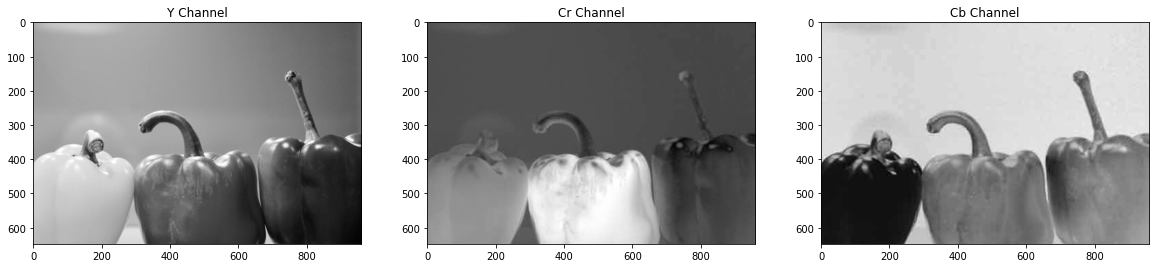

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Y Channel")
plt.imshow(ycbImage[:,:,0],cmap="gray")
plt.subplot(1,3,2)
plt.title("Cr Channel")
plt.imshow(ycbImage[:,:,1],cmap="gray")
plt.subplot(1,3,3)
plt.title("Cb Channel")
plt.imshow(ycbImage[:,:,2],cmap="gray")
plt.show()

#### <font style = "color:rgb(8,133,37)">Observations </font>
- Y Channel looks similar to a grayscale image. 
- Cr Channel indicates the amount of Red in the image, which is evident from the high values of the middle (red) pepper. Similarly, 
- Cb indicates the amount of Blue in the image, which is why the blue background displays high values.

# <font style = "color:rgb(50,120,229)">The Lab color space</font>

The Lab color space consists of :

* **L**ightness

* **A** (a color component ranging from Green to Magenta) 

* **B** (a color component ranging from Blue to Yellow).

The **L channel encodes brightness, while the A and B channels encode color**. 

The following code shows how to convert from BGR to Lab color space in OpenCV.

In [ ]:
# convert from bgr to LAB format
labImage = cv2.cvtColor(bgr, cv2.COLOR_BGR2Lab)

The following figure shows the three channels in grayscale. 
- Lower values in A channel indicate green color and higher values indicate magenta (or red). 
- Similarly, lower values in B channel indicate blue color and higher values indicate yellow color.

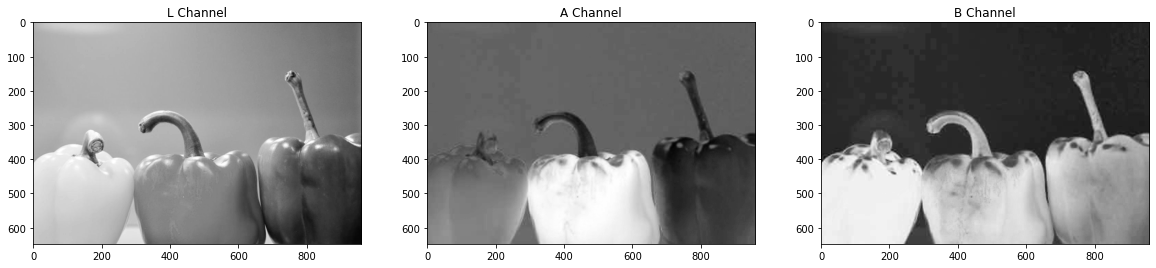

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("L Channel")
plt.imshow(labImage[:,:,0],cmap="gray")
plt.subplot(1,3,2)
plt.title("A Channel")
plt.imshow(labImage[:,:,1],cmap="gray")
plt.subplot(1,3,3)
plt.title("B Channel")
plt.imshow(labImage[:,:,2],cmap="gray")
plt.show()

#### <font style = "color:rgb(8,133,37)">Observations </font>
- In the **A channel** - the right (green) pepper has lower values and the middle (red) pepper has higher values than everything else. 
- Similarly for **B channel**, the blue background shows low values, and the left (yellow) pepper has high values.

# <font style="color:rgb(50,120,229)">Application 1 - Find the dominant colors in an image</font>

Imagine you are building a visual search engine for clothing in an online store where people can search for clothing by color. So every clothing item in your store will need to be tagged with the dominant color(s) of the clothing item. 

In this application, we will identify the dominant colors using the hue of colors in a photo and also learn an important concept called **Histogram**.

## <font style="color:rgb(50,120,229)">What is a Histogram?</font>
|
A histogram is a very important tool in Image processing. It is a graphical representation of the distribution of data. An **image histogram** gives a graphical representation of the tonal distribution in a digital image.

The x-axis indicates the range of values the variable can take. This range can be divided into a series of intervals called **_bins_**. The y-axis shows the count of how many values fall within that interval or bin. 

Before going into image histograms, let’s take a very simple example to illustrate what are histograms. 

Suppose we want to study the performance of students in a class of 50 students in a subject - Mathematics. The minimum and maximum performance scores are 0 and 100, respectively. The scores obtained by the 50 students are given below.

```
marks = [9, 7, 10, 15, 18, 21, 33, 35, 30, 31, 41, 46, 43, 41, 41, 42, 45, 41, 49, 45, 50, 51, 53, 53, 56,
         60, 64, 62, 65, 61, 65, 71, 72, 74, 71, 70, 71, 75, 72, 73, 72, 70, 83, 85, 87, 85, 82, 97, 100, 99 ]
```
<center>Marks obtained by 50 students in a class</center>

For computing the histogram, we divide the overall range of 100 scores into 10 bins so that 
1. scores 0-10 are in bin 1, 
1. scores 11-20 are in bin 2 and so on. 

The histogram simply counts the number of students with scores falling in a certain bin. For example, only 2 students got scores in the range 0-10. Thus, bin 1 has a count of 2. Similarly, bin 2 and 10 have counts of 3 and so on.


<table style="width:100%">
  <tr>
    <th style = "width:55%">   
         marks = [9, 7, 10, 15, 18,
         21, 33, 35, 30, 31,
         41, 46, 43, 41, 41,
         42, 45, 41, 49, 45,
         50, 51, 53, 53, 56,
         60, 64, 62, 65, 61, 
         65, 71, 72, 74, 71,
         70, 71, 75, 72, 73,
         72, 70, 83, 85, 87,
         85, 82, 97, 100, 99 ]
         </th>
    <th><center> <img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m1-histogramScore.png"/></center></th> 
  </tr>
  <tr>
      <td><center>Array containing scores of 50 students</center></td>
      <td><center>Histogram plot of scores obtained</center></td>
  </tr>
</table>


Just by looking at the histograms, we get a good idea about the distribution of data which is not possible by just looking at the array of numbers. For example,

- From the histogram plotted above, we can infer that a lot of students received scores in the ranges of 40-50 (10 students) and 70-80 (11 students). 
- It can also be seen that most students received a score of more than 40. 

#### <font style="color:rgb(8,133,37)">Note</font>  
We can change the bin size (10 marks) and accordingly the number of bins (10 bins) will also change. For a bin size of 5, the number of bins will become 20.

## <font style="color:rgb(50,120,229)">Image Histogram </font>
An image histogram is similar to what we discussed above. In case of image histogram,
- the x-axis represents the different intensity values or range of intensity values ( also called **bins** ), which lie between 0 and 255, and 
- the y-axis represents the **number of times a particular intensity value occurs in the image**.


## <font style="color:rgb(50,120,229)">Histograms using Matplotlib</font>
We will use the function [**`plt.hist()`**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) available in the matplotlib library for drawing the histogram.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
```python
hist, bins, patches	=	plt.hist( x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None )
```

**Parameters**

There are many parameters in the function. Let us go over the most important and frequently used ones.

**Input**
- **`x`** - source image as an array
- **`bins`** - number of bins
- **`color`** - color for plotting the histogram

**Output**
- **`hist`** - histogram array
- **`bins`** - edges of bins

#### <font style="color:rgb(200,0,0)">NOTE </font>
The input to the function is an array ( not an image matrix ). Thus, we need to flatten the matrix into an array before passing it to the function.

## <font style="color:rgb(50,120,229)">Histogram Code</font>

In this program, we will find the histogram of the Hue Channel and plot it to see what major colors are present in the image.

In [ ]:
filename = DATA_PATH+"images/jersey.jpg"

(-0.5, 384.5, 384.5, -0.5)

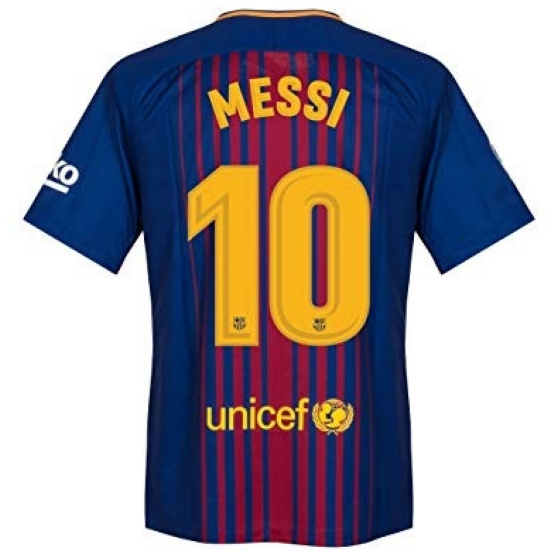

In [ ]:
img = cv2.imread(filename)
plt.figure(figsize=[20,10])
plt.imshow(img[...,::-1])
plt.axis('off')

In [ ]:
print("Image Dimensions = {}\n".format(img.shape))

Image Dimensions = (385, 385, 3)



Next, we convert the image to HSV Color space using the `cvtColor` function, convert the hsvImage to float32 and split the image into its channels H, S and V.

In [ ]:
# Convert to HSV color space
hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [ ]:
# Split the channels
H, S, V = cv2.split(hsvImage)
print(H)
print(H.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(385, 385)


The background is white and we are not interested in that. So, let's remove all pixels with white / gray values. This can be easily done by not considering all pixels below a certain saturation.

In [ ]:
# Remove unsaturated (white/gray) pixels 
H_array = H[S > 10].flatten()

In [ ]:
print(H_array)
print(H_array.shape)

[26 23 30 ... 92 45 39]
(85188,)


Text(0.5, 1.0, 'Histogram')

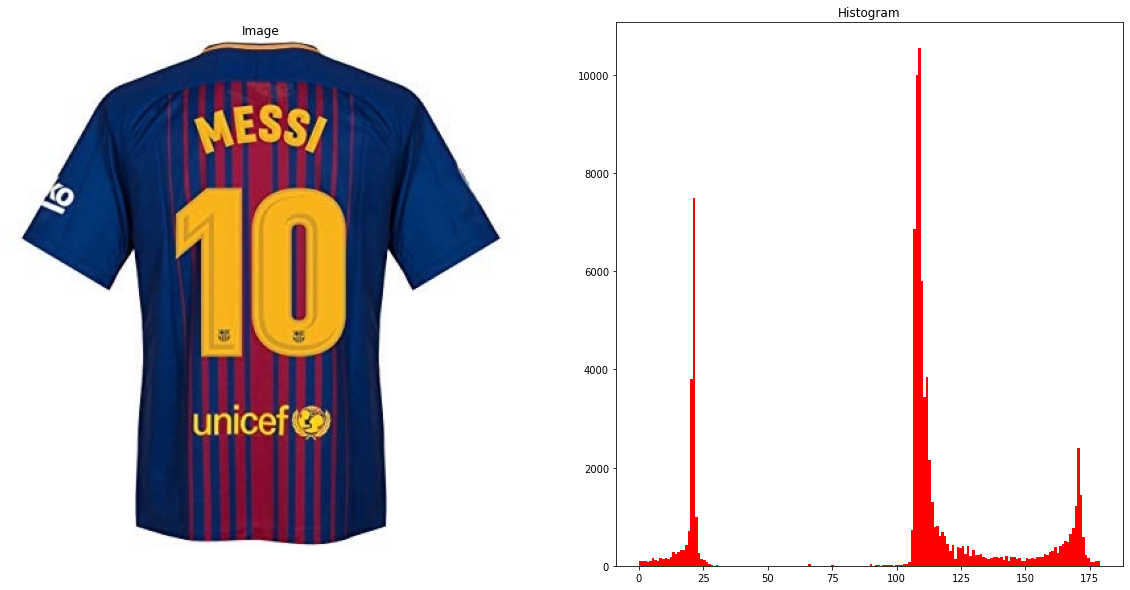

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Image");plt.axis('off')
plt.subplot(122);plt.hist(H_array, bins=180, color='r');plt.title("Histogram")

From the histogram plot, we can see that the peaks are at 23 (i.e. hue = 46, yellow-ish) , 110 (i.e. hue 220, blue-ish) and 170 (hue = 340, red-ish). These correspond to Red, Yellow, Green and Blue colors respectively. The highest peak is for blue since that is the most dominant color in the image.


# <font style="color:rgb(50,120,229)"> Application 2 - Desaturation Filter</font>

Photo editing apps like photoshop or instagram use many different kinds of image enhancement techniques to make the images look special. One such image enhancement technique is desaturation. We desaturate the image by decreasing the values in the Saturation channel. This result in an image which looks faded or washed out, with no colors. This effect is used in many instagram filters. 

We will desaturate a given image using the S channel of the HSV image.

In [ ]:
matplotlib.rcParams['image.interpolation']='bilinear'

In [ ]:
filename = DATA_PATH+"images/girl.jpg"
img = cv2.imread(filename)

Next, we convert the image to HSV color space using the `cvtColor` function, convert the `hsvImage` to `float32` and split the image into its channels H, S, V.

In [ ]:
# Specify scaling factor
saturationScale = 0.01

# Convert to HSV color space
hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# Convert to float32
hsvImage = np.float32(hsvImage)

# Split the channels
H, S, V = cv2.split(hsvImage)

Next, we scale the S channel with a scale factor and merge the channels back to get the final output. 

We need to convert to the `uint8` datatype since we had done the multiplication in `float32`. 

In [ ]:
# Multiply S channel by scaling factor and clip the values to stay in 0 to 255 
S = np.clip(S * saturationScale , 0, 255)

# Merge the channels and show the output
hsvImage = np.uint8( cv2.merge([H, S, V]) )
imSat = cv2.cvtColor(hsvImage, cv2.COLOR_HSV2BGR)

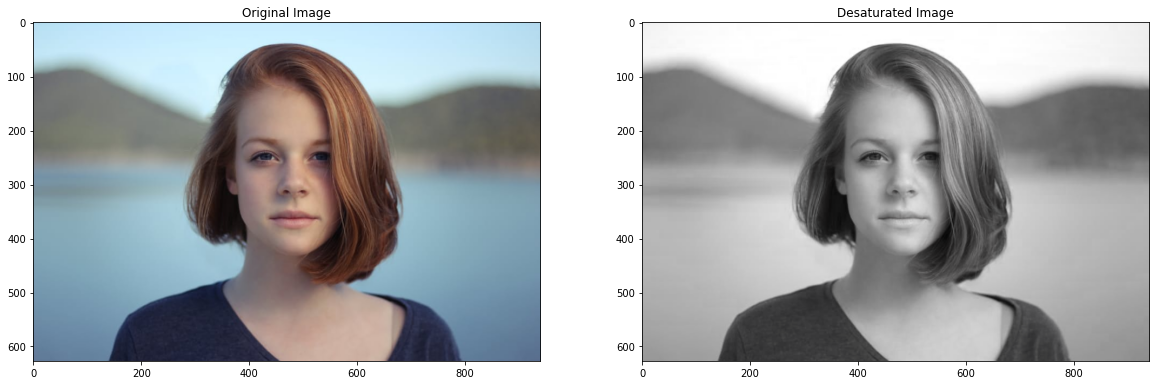

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title('Original Image')
plt.subplot(122);plt.imshow(imSat[...,::-1]);plt.title('Desaturated Image');

# <font style="color:rgb(50,120,229)">Introduction </font>
We had seen in the previous lesson, how to improve contrast in an image using simple intensity scaling approach. In this section, we will describe better ways of improving contrast in the image.

# <font style="color:rgb(50,120,229)">Histogram Equalization</font>

Histogram Equalization is a non-linear method for enhancing contrast in an image. We have already seen the theory in the video. Now, let's see how to perform histogram equalization using OpenCV using [**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e). 

# <font style="color:rgb(50,120,229)">Histogram Equalization for Grayscale Images</font>

The function [**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e) performs histogram equalization on a grayscale image. The syntax is given below.


### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
	dst	=	cv2.equalizeHist(	src[, dst]	)
```

**Parameters**

- **`src`** -	Source 8-bit single channel image.
- **`dst`** -	Destination image of the same size and type as src .

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50.0, 50.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.titlesize'] = 40
matplotlib.rcParams['image.interpolation'] = 'bilinear'

(-0.5, 541.5, 749.5, -0.5)

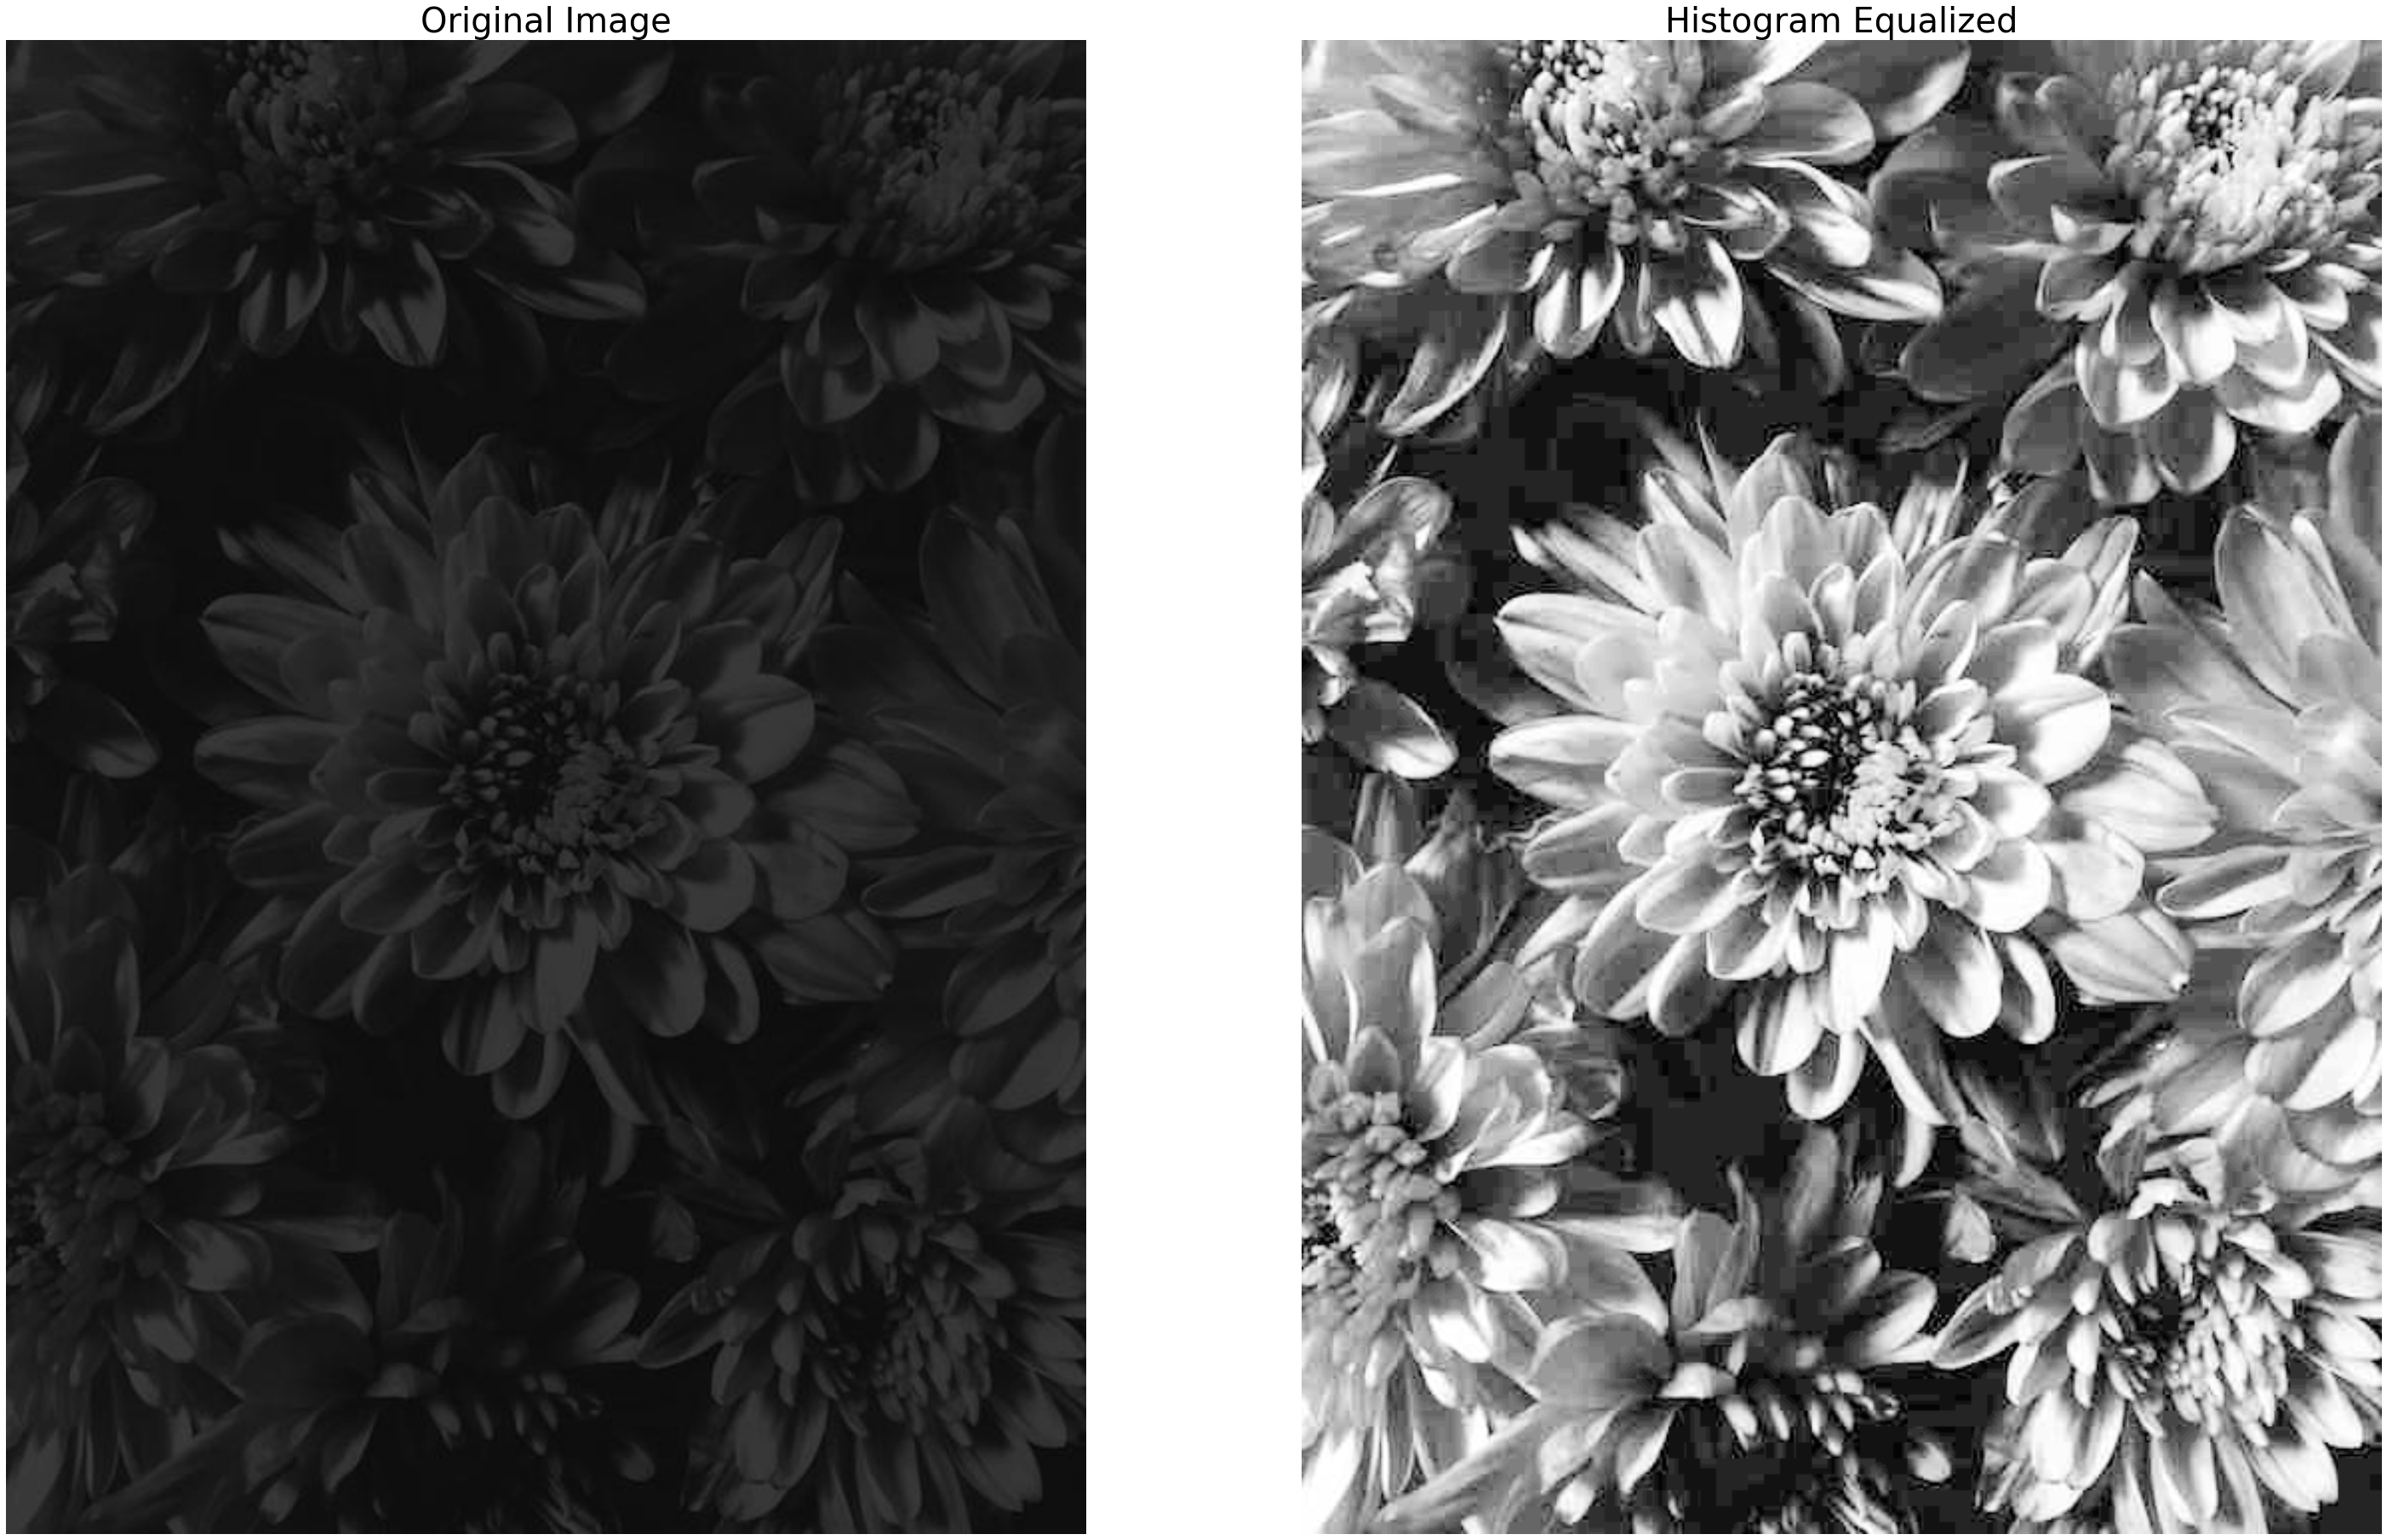

In [ ]:
# Read image in grayscale format
filename = DATA_PATH+"images/dark-flowers.jpg"
im = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Equalize histogram
imEq = cv2.equalizeHist(im)

#Display images
plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(im, vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(imEq, vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')